In [55]:
import sklearn as sk 
import numpy as np
import pandas as pd
import tensorflow as tf
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline


In [2]:
from sklearn.datasets import make_regression

In [3]:
X, y, coef = make_regression(
    n_samples = 100,
    n_features = 10,
    n_informative=8,
    bias = 0.55,
    noise = 1.5,
    coef = True
    )

In [4]:
coef

array([61.59430953, 88.39592913, 43.91731645, 82.48808048, 87.89131754,
        0.        ,  5.81437888, 81.80391923,  0.        , 14.32738667])

In [5]:
def scatter3d(x,y,z, cs, colorsMap='jet'):
    import matplotlib.cm as cmx
    from mpl_toolkits.mplot3d import Axes3D
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    plt.show()

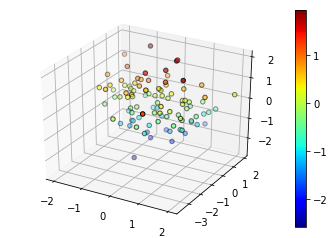

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax = ax.scatter(X[:,0],X[:,1],X[:,2], c=X[:,2], cmap='jet',edgecolors='black', linewidth=1)
fig.colorbar(ax)

In [7]:
from sklearn.decomposition import PCA

In [8]:
pca = PCA()
X2D = pca.fit_transform(X)

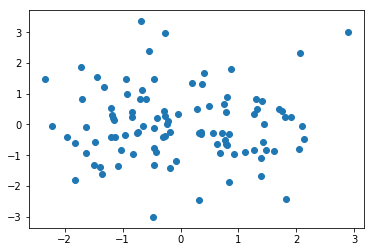

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax = ax.scatter(X2D[:,0],X2D[:,1])

In [10]:
pca.components_.T

array([[ 0.17326122, -0.10742795,  0.23968497, -0.02962091, -0.36354638,
        -0.37693634,  0.24430049, -0.68064523, -0.08179231,  0.31018685],
       [-0.2226694 , -0.28393811,  0.36297165,  0.05397021, -0.426933  ,
         0.17700513, -0.42234032,  0.05030001,  0.5803892 ,  0.06148676],
       [ 0.05199224, -0.05631411, -0.27549344,  0.09424212,  0.16630486,
         0.61720304,  0.43792296, -0.29890781,  0.4106845 ,  0.22575707],
       [ 0.22009713,  0.57776129, -0.2548238 , -0.1995144 , -0.15400279,
         0.22573777, -0.56836667, -0.26016865, -0.05064439,  0.21222708],
       [ 0.16324798, -0.29187502,  0.31029482,  0.46410028,  0.25219721,
         0.38039613, -0.31612994, -0.24974973, -0.45119223, -0.04790603],
       [-0.22070178, -0.45378964, -0.08468162, -0.56876747,  0.29742885,
         0.02410396, -0.18570472,  0.02467004, -0.18047315,  0.50792514],
       [-0.22957025,  0.46765918,  0.46511796,  0.24453308,  0.36241604,
        -0.112829  ,  0.07010198,  0.13904325

In [11]:
pca.explained_variance_ratio_


array([0.14715261, 0.14015139, 0.12013682, 0.11495769, 0.10288247,
       0.09443798, 0.08496954, 0.07694768, 0.06240961, 0.0559542 ])

In [12]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) >= .65)+1

6

In [13]:
def load_mnist():
    """Function to download mnst data from public source.
        Args:
            None

        Returns:
            train_set --tuple of data and target

            valid_set --tuple of data and target

            test_set --tuple of data and target
    """
    import urllib.request, pickle, gzip
    r = urllib.request.urlretrieve('http://deeplearning.net/data/mnist/mnist.pkl.gz','mnist.pkl.gz')
    filename = r[0]
    print(filename)
    with gzip.open(filename, 'rb') as f:
        train_set, valid_set, test_set = pickle.load(f,encoding='bytes')
        f.close()
    return train_set, valid_set, test_set

train_set, valid_set, test_set = load_mnist()

X_train = train_set[0]
y_train = train_set[1]

# X_valid = valid_set[0]
# y_valid = valid_set[1]

# X_test = test_set[0]
# y_test = test_set[1]

mnist.pkl.gz


In [14]:
pca = PCA(n_components = .25)

In [15]:
X_train_reduced = pca.fit_transform(X_train)
X_train_decompressed = pca.inverse_transform(X_train_reduced)

In [16]:
print(X_train.shape)
print(X_train_reduced.shape)
print(X_train_decompressed.shape)

(50000, 784)
(50000, 4)
(50000, 784)


In [17]:
def plot_digits(data, images_per_row=None):
    from matplotlib.cm import binary
    images_per_row = images_per_row or int(np.ceil(np.sqrt(len(data))))
    rows = int(np.ceil(len(data)/images_per_row))
    fig = plt.figure()
    i = 0
    j = 0
    k=0
    for d in data:
        i = int(np.floor(k/images_per_row))
        j = k % images_per_row
        k = k+1
        d = d.reshape(28, 28)
        #print(i,j,images_per_row,rows)
        ax = plt.subplot2grid((rows,images_per_row),(i,j))
        ax.imshow(d, cmap = binary,
        interpolation="nearest")
        plt.axis("off")
       

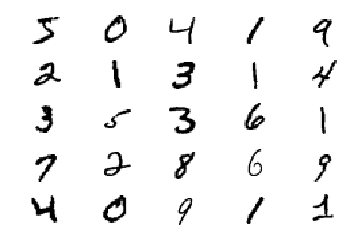

In [18]:
plot_digits(X_train[:25])

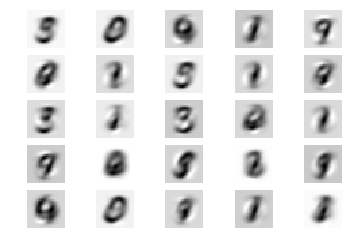

In [19]:
plot_digits(X_train_decompressed[:25])

In [20]:
from sklearn.decomposition import IncrementalPCA

In [21]:
n_batches = 100
inc_pca = IncrementalPCA(
    n_components = 154    
    )
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

X_train_inc_reduce = inc_pca.transform(X_train)

In [22]:
# import os.path as path
# filename = os.getcwd() + '/MNIST_X_train.bin'
# X_train_mm = np.memmap(filename=filename, dtype='float32', mode='w+', shape = X_train.shape)


In [23]:
inc_pca = IncrementalPCA(
    n_components = 100,
    batch_size = 100
    )
inc_pca.fit(X_train_mm)

NameError: name 'X_train_mm' is not defined

In [ ]:
rnd_pca = PCA(
    n_components = 154,
    svd_solver = 'randomized'
    )

In [ ]:
from sklearn.decomposition import KernelPCA


In [ ]:
rbf_pca = KernelPCA(
    n_components = 2,
    kernel = 'rbf',
    gamma = 0.04
    )

X_train_reduced_rbf = rbf_pca.fit_transform(X_train[:25])

In [ ]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ('kpca',KernelPCA(n_components = 2)),
    ('log_reg', LogisticRegression())
    ])

In [ ]:
param_grid = {
    'gamma': np.linspace(0.03,0.05,10),
    'kernel':['rbf','sigmoid']
    }

In [ ]:
rbf_pca.get_params()

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train[:25], y_train[:25])

In [ ]:
rbf_pca = KernelPCA(
    n_components = 2,
    kernel = 'rbf',
    gamma = 0.0433,
    fit_inverse_transform = True
    )

In [ ]:
X_reduced = rbf_pca.fit_transform(X_train[:100])

In [ ]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
plot_digits(X_train[:5])

In [ ]:
plot_digits(X_preimage[:5])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(X_train[:100],X_preimage)

In [24]:
from sklearn.datasets import make_swiss_roll

In [25]:
X, t = make_swiss_roll(
    n_samples = 1000
    )

In [72]:
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap, MDS
from sklearn.decomposition import KernelPCA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [73]:
lle = LocallyLinearEmbedding(
    n_components = 2,
    n_neighbors = 10
    )
X_reduced_lle = lle.fit_transform(X)

rbf_pca = KernelPCA(
    n_components = 2,
    kernel = 'rbf',
    gamma = 0.0433,
    fit_inverse_transform = True
    )
X_reduced_rbf = rbf_pca.fit_transform(X)


pca = PCA(
    n_components = 2
    )
X_reduced_pca = pca.fit_transform(X)

rnd_pca = PCA(
    n_components = 2,
    svd_solver = 'randomized'
    )
X_reduced_rnd = rnd_pca.fit_transform(X)

tsne = TSNE(
    n_components = 2
    )
X_reduced_tsne = tsne.fit_transform(X)

isomap = Isomap(
    n_components = 2
    )
X_reduced_isomap = isomap.fit_transform(X)

mds = MDS(
    n_components = 2
    )
X_reduced_mds = mds.fit_transform(X)

#LDA is a method for classification problems only
# lda = LinearDiscriminantAnalysis(
#     n_components = 2
#     )
# X_reduced_lda = lda.fit_transform(X)

<function matplotlib.pyplot.show(*args, **kw)>

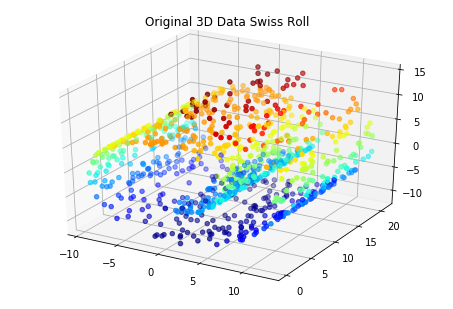

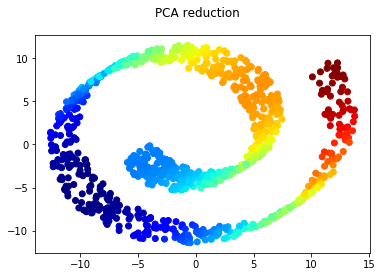

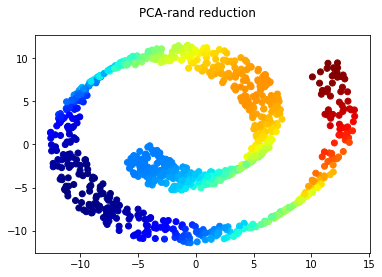

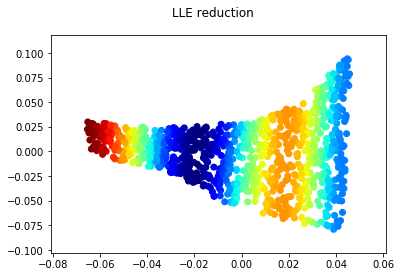

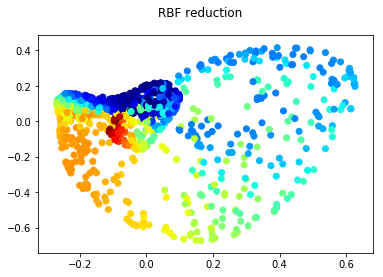

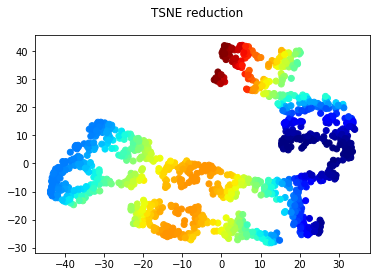

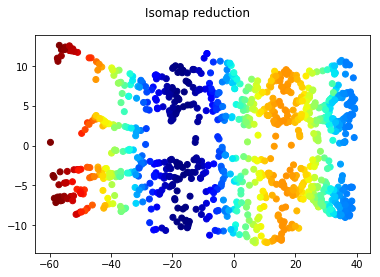

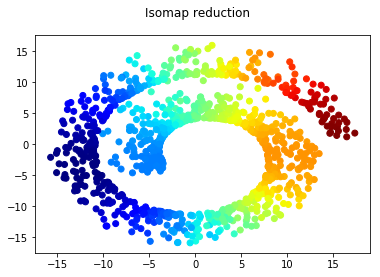

In [74]:
fig = plt.figure()
ax = Axes3D(fig)
ax = ax.scatter(X[:,0],X[:,1],X[:,2],c=X[:,2], cmap ='jet')
plt.suptitle('Original 3D Data Swiss Roll')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=X[:,2], cmap='jet')
plt.suptitle('PCA reduction')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_rnd[:,0],X_reduced_rnd[:,1],c=X[:,2], cmap='jet')
plt.suptitle('PCA-rand reduction')
plt.show


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_lle[:,0],X_reduced_lle[:,1],c=X[:,2], cmap='jet')
plt.suptitle('LLE reduction')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_rbf[:,0],X_reduced_rbf[:,1],c=X[:,2], cmap='jet')
plt.suptitle('RBF reduction')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=X[:,2], cmap='jet')
plt.suptitle('TSNE reduction')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_isomap[:,0],X_reduced_isomap[:,1],c=X[:,2], cmap='jet')
plt.suptitle('Isomap reduction')
plt.show

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X_reduced_mds[:,0],X_reduced_mds[:,1],c=X[:,2], cmap='jet')
plt.suptitle('Isomap reduction')
plt.show

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.scatter(X_reduced_lda[:,0],X_reduced_lda[:,1],c=X[:,2], cmap='jet')
# plt.suptitle('LDA reduction')
# plt.show